In [1]:
# Cải tiến hiệu suất của mô hình phân loại rác thải sử dụng Keras và Deep Learning

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt
# Xây dựng mạng CNN:

#Khởi tạo một mạng neural tuần tự.
#Thêm lớp tích chập vào mạng để trích xuất đặc trưng từ ảnh đầu vào.
#Thêm lớp tối đa hóa để giảm kích thước của đầu ra từ lớp tích chập.
#Thêm các lớp tích chập và lớp tối đa hóa tiếp theo để tăng độ sâu và khả năng học của mạng

In [2]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3,3), activation = 'sigmoid'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3,3), activation = 'sigmoid'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3,3), activation = 'sigmoid'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3,3), activation = 'sigmoid'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [3]:
# Step 3 - Flattening
classifier.add(Flatten())
# Chuyển đổi dữ liệu ảnh từ định dạng 2D sang 1D bằng lớp Flatten

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'sigmoid'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
#  Thêm lớp kết nối đầy đủ để kết nối các đặc trưng đã trích xuất từ mạng CNN với quá trình phân loại; Sử dụng hàm kích hoạt 'sigmoid' cho các lớp kết nối đầy đủ để đưa ra dự đoán phân loại.
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Biên dịch mạng CNN bằng cách cung cấp các thông số: Thuật toán tối ưu 'adam' để điều chỉnh các trọng số của mạng; Hàm mất mát 'sparse_categorical_crossentropy' để đo lường sai số giữa dự đoán và nhãn thực tế; Chỉ số 'accuracy' để đánh giá hiệu suất của mô hình.
# quá trình trên bao gồm xây dựng mạng CNN, chuẩn bị dữ liệu, xây dựng các lớp kết nối đầy đủ và biên dịch mạng. Điều này chuẩn bị mạng để có thể huấn luyện trên dữ liệu và đưa ra dự đoán chính xác cho các lớp phân loại.

In [4]:
# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set_path = 'E:/Ghub/dataset/training_set'
training_set = train_datagen.flow_from_directory(training_set_path,
                                                 target_size = (128, 128),
                                                 batch_size = 16,
                                                 class_mode = 'binary')

test_set_path = 'E:/Ghub/dataset/test_set'
test_set = test_datagen.flow_from_directory(test_set_path,
                                            target_size = (128, 128),
                                            batch_size = 16,
                                            class_mode = 'binary')

Found 1100 images belonging to 6 classes.
Found 237 images belonging to 6 classes.


In [5]:
history = classifier.fit(training_set,
                         steps_per_epoch = 1100 // 16,  # Trả về kết quả nguyên
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 237 // 16)  # Trả về kết quả nguyên

Epoch 1/25
68/68 [==============================] - 26s 362ms/step - loss: -9.9336 - accuracy: 0.1817 - val_loss: -18.5089 - val_accuracy: 0.1696
Epoch 2/25
68/68 [==============================] - 23s 340ms/step - loss: -19.0537 - accuracy: 0.1836 - val_loss: -26.2707 - val_accuracy: 0.1607
Epoch 3/25
68/68 [==============================] - 24s 348ms/step - loss: -26.1666 - accuracy: 0.1808 - val_loss: -34.1952 - val_accuracy: 0.1786
Epoch 4/25
68/68 [==============================] - 23s 333ms/step - loss: -32.6192 - accuracy: 0.1827 - val_loss: -41.9652 - val_accuracy: 0.1696
Epoch 5/25
68/68 [==============================] - 22s 322ms/step - loss: -39.6431 - accuracy: 0.1836 - val_loss: -51.1079 - val_accuracy: 0.1652
Epoch 6/25
68/68 [==============================] - 23s 337ms/step - loss: -46.2586 - accuracy: 0.1827 - val_loss: -58.2433 - val_accuracy: 0.1652
Epoch 7/25
68/68 [==============================] - 25s 369ms/step - loss: -53.2674 - accuracy: 0.1817 - val_loss: -64.

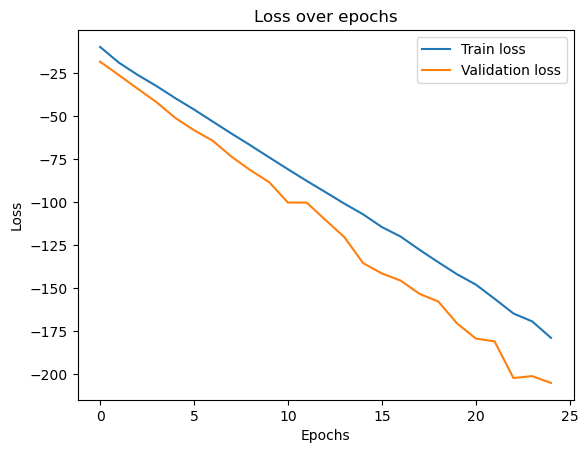

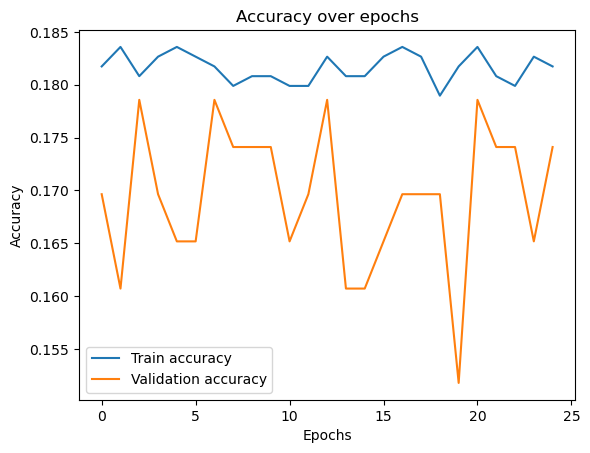

In [6]:
# Trực quan loss
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
if 'val_loss' in history.history:  # Kiểm tra xem có dữ liệu kiểm định không
    plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Trực quan accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
if 'val_accuracy' in history.history:  # Kiểm tra xem có dữ liệu kiểm định không
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Loss over epochs: Khi đường validation loss thấp hơn train loss, đây thường là dấu hiệu tốt cho thấy mô hình của bạn không 
# đang bị overfitting (hiện tượng mô hình học quá tốt trên dữ liệu huấn luyện và thể hiện kém trên dữ liệu kiểm thử). 
# Trong trường hợp này, việc validation loss thấp hơn có thể do sự ngẫu nhiên trong quá trình huấn luyện, hoặc do 
# việc sử dụng các kỹ thuật augmentation trên dữ liệu huấn luyện nhưng không áp dụng lên dữ liệu validation.
#Accuracy over epochs: Nếu đường validation accuracy dao động rõ rệt và không ổn định, có thể mô hình của bạn đang 
# gặp phải vấn đề overfitting. Điều này có nghĩa là mô hình học quá tốt trên tập huấn luyện và không thể tổng quát 
# hóa tốt trên tập kiểm thử.

In [7]:
class_names = {0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}

In [13]:
pip install --upgrade keras

In [14]:
import keras
print(keras.__version__)

2.12.0


In [15]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Tạo từ điển ánh xạ
class_names = {0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}

# Đường dẫn đến thư mục chứa ảnh cần dự đoán
predict_dir = 'E:/Ghub/dataset/predict_set'

# Duyệt qua mỗi ảnh trong thư mục
for file_name in os.listdir(predict_dir):
    # Tạo đường dẫn đầy đủ đến ảnh
    img_path = os.path.join(predict_dir, file_name)
    
    # Tải và chuẩn hóa ảnh
    img = image.load_img(img_path, target_size=(128, 128))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor = img_tensor.astype('float32') / 255

    # Dự đoán
    predictions = classifier.predict(img_tensor)
    predicted_class = np.argmax(predictions)

    # In ra lớp dự đoán
    print(f"Ảnh {file_name} được dự đoán thuộc lớp: {class_names[predicted_class]}")


1/1 [==============================] - 0s 37ms/step
Ảnh predict1.jpg được dự đoán thuộc lớp: cardboard
1/1 [==============================] - 0s 43ms/step
Ảnh predict10.jpg được dự đoán thuộc lớp: cardboard
1/1 [==============================] - 0s 34ms/step
Ảnh predict11.jpg được dự đoán thuộc lớp: cardboard
1/1 [==============================] - 0s 33ms/step
Ảnh predict12.jpg được dự đoán thuộc lớp: cardboard
1/1 [==============================] - 0s 41ms/step
Ảnh predict13.jpg được dự đoán thuộc lớp: cardboard
1/1 [==============================] - 0s 33ms/step
Ảnh predict14.jpg được dự đoán thuộc lớp: cardboard
1/1 [==============================] - 0s 32ms/step
Ảnh predict15.jpg được dự đoán thuộc lớp: cardboard
1/1 [==============================] - 0s 34ms/step
Ảnh predict2.jpg được dự đoán thuộc lớp: cardboard
1/1 [==============================] - 0s 31ms/step
Ảnh predict3.jpg được dự đoán thuộc lớp: cardboard
1/1 [==============================] - 0s 35ms/step
Ảnh predict4.jp